<a href="https://colab.research.google.com/github/QwertyJacob/HERO/blob/main/hero_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb
import wandb
api = wandb.Api()
runs = api.runs("jfcevallos/hero")

In [3]:
# Define a set of highly visible, distinct colors
distinct_colors = [
    '#FF1493',   # Deep Pink
    '#4B0082',   # Indigo
    '#00CED1',   # Dark Turquoise
    '#32CD32',   # Lime Green
    '#FF4500',   # Orange Red
    '#9400D3',    # Dark Violet
    # Additional Vibrant Colors
    '#1E90FF',   # Dodger Blue
    '#FF6347',   # Tomato
    '#2E8B57',   # Sea Green
    '#DC143C',   # Crimson
    '#FF8C00',   # Dark Orange
    '#9932CC',   # Dark Orchid
    '#00FF7F',   # Spring Green
]

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np
import warnings
warnings.filterwarnings('ignore')

runs_dict = {}
runs_ids_dict = {}
for run in runs:
  print(run.name, run.id)
  runs_dict[run.name] = run.history()
  runs_ids_dict[run.name] = run.id

Pretraining 4ew0kt85
Training_EncDec ud00lokj
Pretraining_MinMaxDec wa5dw0em
Training_EncMinMaxDec 281usvyk
Retraining_FT_MinMaxDecoder kk2b02lo
Retraining_FT_ConfDec 804uoe74
hpo_kr_alpha0.5 cdsevnwp
hpo_kr_alpha0.3 wta1007a
hpo_kr_alpha0.3 BIS rmkpcd8i
hpo_kr_alpha0.01 kbg9l3i1
hpo_kr_alpha0.1 fuiaxaso
hpo_kr_alpha0.7 1n5admap
hpo_kr_alpha0.3 f2m0kp6l
hpo_kr_alpha0.1 7l8zwll1
ft_proclr_0.00001_GROK lid5cpjs
enc_mobilenet_v3_large 07rl5gtl
enc_squeezenet1_1 sfhqrfvm
enc_squeezenet1_0 xg70d85s
enc_mobilenet_v3_small s4u8rxnp
pr_enc_dec_llr_0.00001 6unb47vr
pr_enc_dec_llr_0.0001 p0gzfeyh
pr_enc_dec_llr_0.00005 w0ayc434
pr_enc_dec_llr_0.000001 3f6ym4c4
pr_enc_lr_0.001_dec_lr_0.0001 ucb5myzl
ft_dropout_0.1 m1rh7tad
ft_proclr_0.00001 xfv5zp3t
ft_dropout_0.2 q3jp24p4
ft_proclr_0.0001 h7ta7ve3
ft_dropout_0.3 BEST 258r7pfu
ft_proclr_0.00005 BEST dsf3ejdf
ft_dropout_0.4 tp5lcyy9
ft_proclr_0.000001 kct73hkr
ft_dropout_0.5 rggsk80t
ft_robust_proc jhaxsxql
NERO m1ca18hy
pt_dec_lr_0.00001 r44x9i8g

# Main results:

In [68]:
main_runs = {
    'NERO': 'NERO',
    'Training_EncMinMaxDec' : 'ASAP',
    'Retraining_FT_ConfDec': 'NERO_FT',
    'ft_dropout_0.3 BEST' : 'HERO',
    }

main_colors = {
    'NERO': '#4B0082',
    'ASAP': '#2E8B57',
    'NERO_FT' : '#00CED1',
    'HERO': '#FF4500',
    }

In [20]:
interesting_metrics = {
    '_step': 'training_step',
    'OS1 Bal. accuracy_eval: ': 'B_Acc',
    'OS2 Bal. accuracy_eval: ': 'A_Acc',
    'CS1 accuracy_eval: ': 'micro_Acc',
    'CS2 accuracy_eval: ': 'macro_Acc',
    'EVAL_Type_A_ROC_AUC': 'A_ROC_AUC',
    'EVAL_Type_A_PR_AUC': 'A_PR_AUC',
    'EVAL_ZDA_ROC_AUC': 'B_ROC_AUC',
    'EVAL_ZDA_PR_AUC' : 'B_PR_AUC',
}

extended_metrics = {
    'OS1 Bal. accuracy_eval: ': 'B_Acc',
    'OS2 Bal. accuracy_eval: ': 'A_Acc',
    'CS1 accuracy_eval: ': 'micro_Acc',
    'CS2 accuracy_eval: ': 'macro_Acc',
    'EVAL_Type_A_ROC_AUC': 'A_ROC_AUC',
    'EVAL_Type_A_PR_AUC': 'A_PR_AUC',
    'EVAL_ZDA_ROC_AUC': 'B_ROC_AUC',
    'EVAL_ZDA_PR_AUC' : 'B_PR_AUC',
    'OS1 accuracy_eval: ': 'B_Acc_unbalanded',
    'OS2 accuracy_eval: ': 'A_Acc_unbalanced',

}

confusion_matrices = {
    'Evaluation (Micro) Open set Confusion Matrix': 'micro_cm',
    'Evaluation (Macro) Open set Confusion Matrix': 'macro_cm'
}


## Tables/figs:

In [58]:
max_steps = 300

final_dfs = {}

for key, value in runs_dict.items():

  if key in list(main_runs.keys()):

    reduced_dataframe = value[list(extended_metrics.keys())]

    reduced_dataframe.columns = [extended_metrics[col] for col in reduced_dataframe.columns]

    for col in reduced_dataframe.columns:

      reduced_dataframe[col] = reduced_dataframe[col].interpolate(method='linear', limit_direction='both')
      reduced_dataframe[col] = reduced_dataframe[col].rolling(window=20).mean()
      reduced_dataframe[col] = reduced_dataframe[col].fillna(reduced_dataframe[col].mean())

    reduced_dataframe = reduced_dataframe.describe().loc[['50%', 'mean', 'max']].transpose()
    reduced_dataframe.columns = [f'{main_runs[key]}_median',f'{main_runs[key]}_mean', f'{main_runs[key]}_max']

    final_dfs[main_runs[key]] = reduced_dataframe[f'{main_runs[key]}_max'][:6000]

In [59]:
final_df = pd.concat(list(final_dfs.values()), axis=1)
final_df.columns = list(final_dfs.keys())

In [61]:
print(final_df[['NERO', 'NERO_FT', 'ASAP', 'HERO']].round(3))

                   NERO  NERO_FT   ASAP   HERO
B_Acc             0.500    0.957  0.958  0.989
A_Acc             0.512    0.621  0.822  0.946
micro_Acc         0.999    0.999  1.000  1.000
macro_Acc         0.993    0.976  0.993  0.996
A_ROC_AUC         0.500    0.941  0.945  0.991
A_PR_AUC          0.762    0.969  0.956  0.992
B_ROC_AUC         0.790    0.862  0.946  0.976
B_PR_AUC          0.645    0.754  0.845  0.923
B_Acc_unbalanded  0.524    0.936  0.952  0.992
A_Acc_unbalanced  0.732    0.732  0.793  0.943


## Plots:

In [65]:
# formatting stuff:
title_font_dict = {'weight': 'bold', 'size': 30}
subtitle_font_dict = {'weight': 'bold', 'size': 26}

axis_font_dict = {'weight': 'bold', 'size': 18}
legend_font_dict = {'weight': 'bold', 'size': 26}

In [66]:
max_steps = 300

final_dfs = {}
for key, value in runs_dict.items():
  if key in list(main_runs.keys()):
    reduced_dataframe = value[list(interesting_metrics.keys())]
    reduced_dataframe.columns = [interesting_metrics[col] for col in reduced_dataframe.columns]
    for col in reduced_dataframe.columns:
      if col != 'training_step':
        reduced_dataframe[col] = reduced_dataframe[col].interpolate(method='linear', limit_direction='both')
        if col != 'A_Acc':
          window_size = 20
        else:
          window_size = 40
        reduced_dataframe[col] = reduced_dataframe[col].rolling(window=20).mean()
        reduced_dataframe[col] = reduced_dataframe[col].fillna(reduced_dataframe[col].mean())

    final_dfs[main_runs[key]] = reduced_dataframe[:6000]

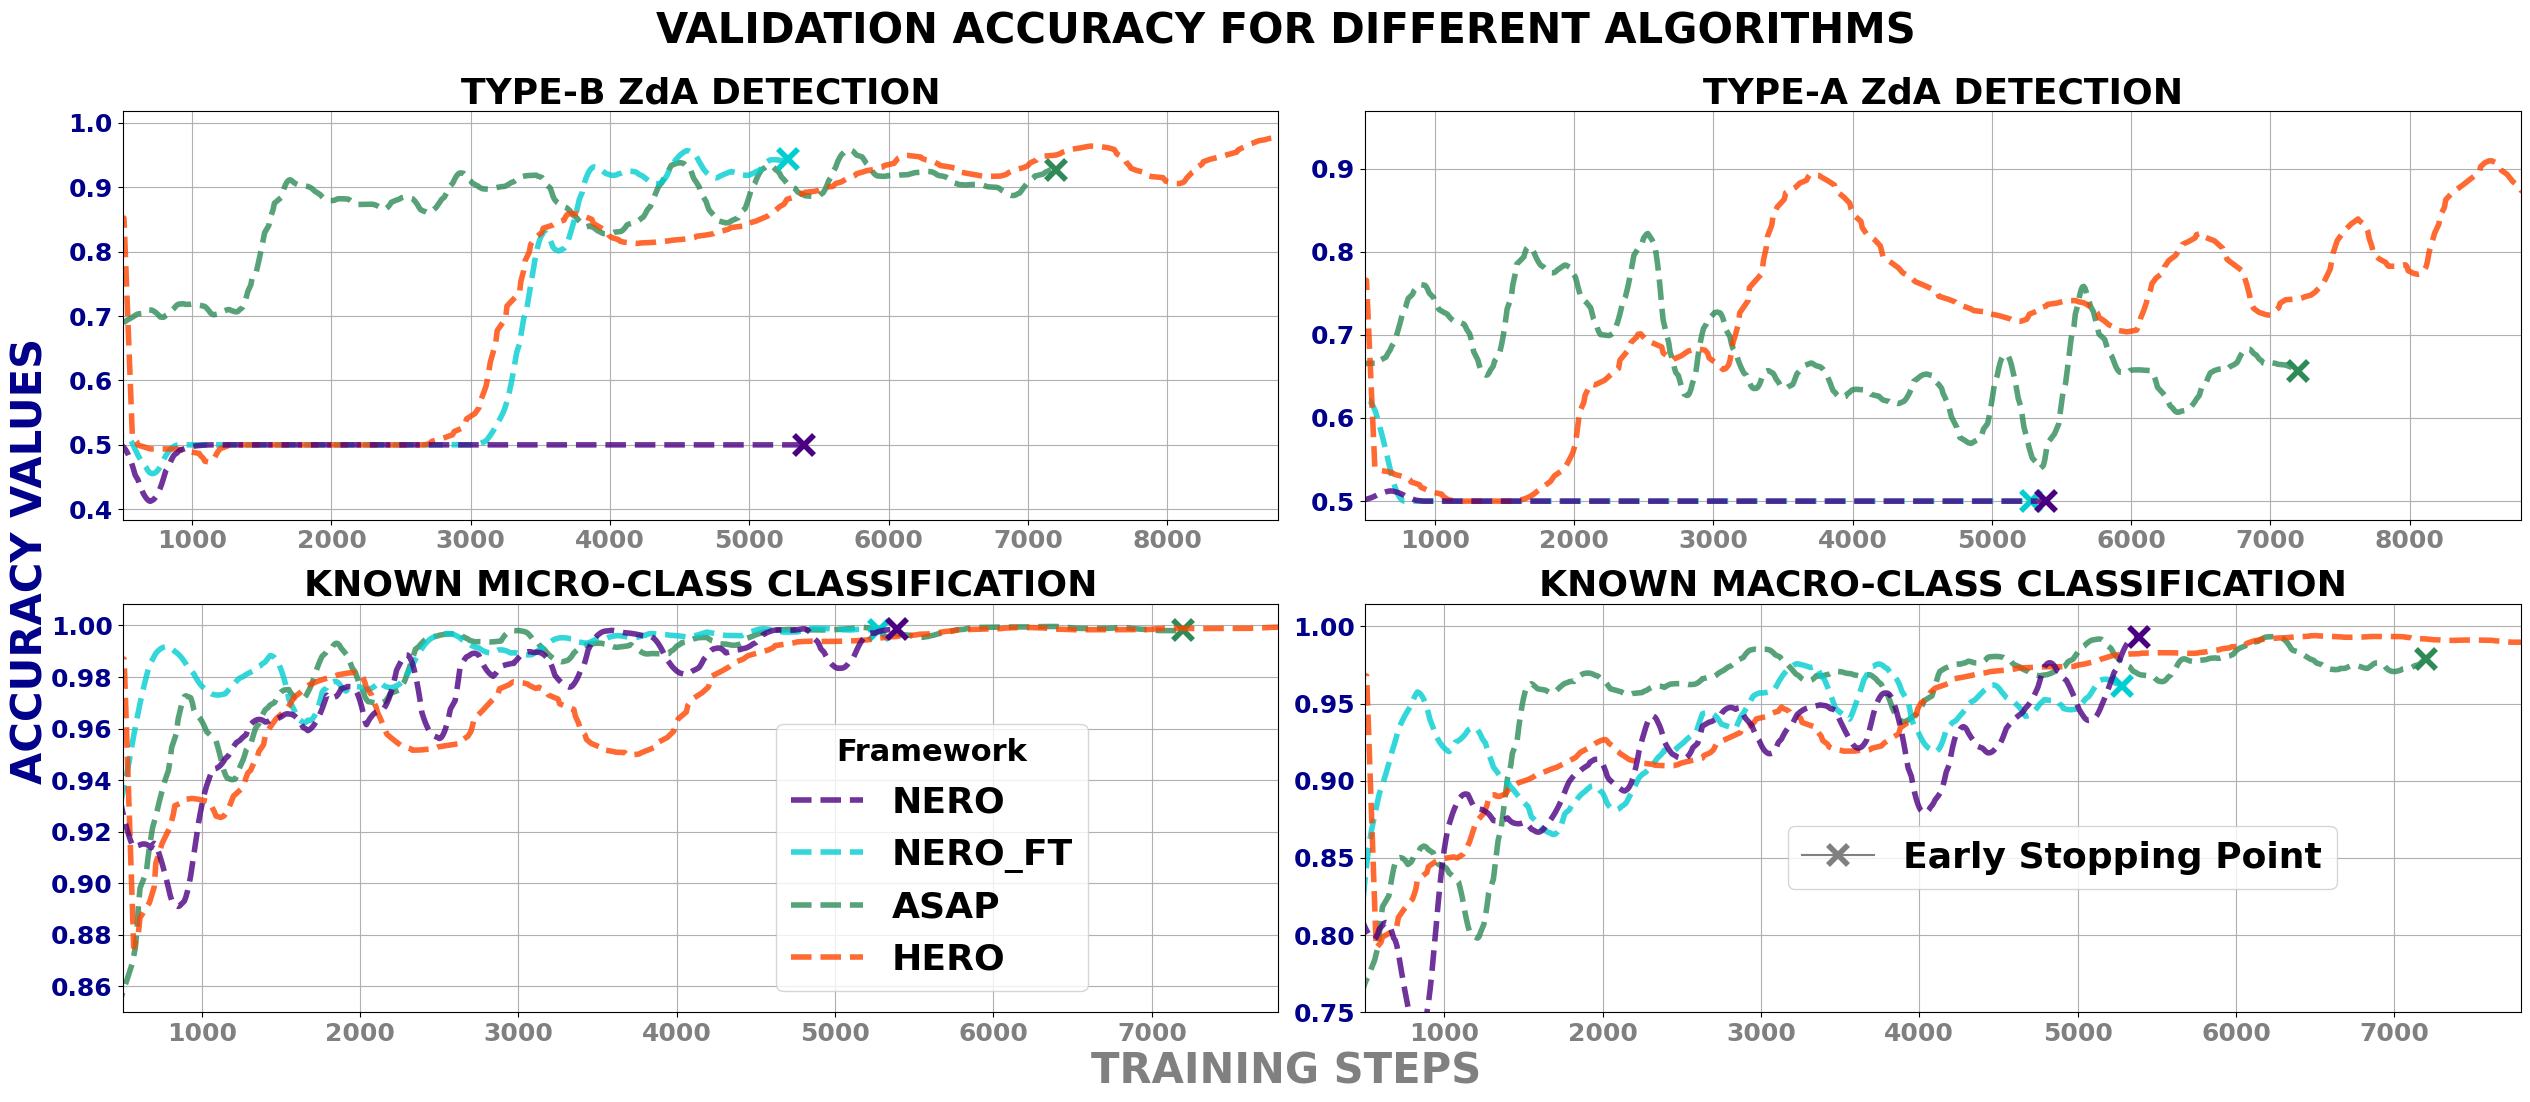

In [69]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(25, 10))


metrics_to_plot = ['B_Acc', 'A_Acc', 'micro_Acc', 'macro_Acc']
titles = ['TYPE-B ZdA DETECTION', 'TYPE-A ZdA DETECTION', 'KNOWN MICRO-CLASS CLASSIFICATION', 'KNOWN MACRO-CLASS CLASSIFICATION']
row = 0
col = 0

for i, metric in enumerate(metrics_to_plot):
    for label, df in final_dfs.items():
        axes[row, col].plot(df['training_step'], df[metric], label=label, alpha=0.8, linewidth=4, linestyle='--', color=main_colors[label])
        # plot a cross mark in the last point of the series:
        axes[row, col].plot(df['training_step'].iloc[-1], df[metric].iloc[-1], marker='x', markeredgewidth=4, markersize=15,  color=main_colors[label])
        # add a dummy cross line for label
        axes[row, col].plot([],[], marker='x', markeredgewidth=4, markersize=15,  color='gray', label='Early Stopping Point')

    # axes[row, col].set_xlabel("Training Steps")
    # axes[row, col].set_ylabel(metric)
    axes[row, col].set_title(titles[i],fontdict=subtitle_font_dict)

    for label in axes[row, col].get_xticklabels():
      label.set_fontsize(18)
      label.set_fontweight('bold')  # Set font weight to bold
      label.set_color('gray')
    for label in axes[row, col].get_yticklabels():
      label.set_fontsize(18)
      label.set_fontweight('bold')  # Set font weight to bold
      label.set_color('darkblue')


    if col == 0:
      if row == 0:
        axes[row, col].set_xlim(left=500, right=8800)
      if row == 1:
        axes[row, col].set_xlim(left=500, right=7800)
        axes[row, col].set_ylim(bottom=0.85)

        # legend stuff
        handles, labels = axes[row, col].get_legend_handles_labels()  # Get legend handles and labels
        new_handles = [handles[6], handles[2], handles[0], handles[4]]
        new_labels = [labels[6], labels[2], labels[0], labels[4]]
        axes[row, col].legend(
            new_handles,
            new_labels,
            prop=legend_font_dict,
            bbox_to_anchor=(0.55, 0.75), title='Framework')
        legend_title = axes[row, col].legend_.get_title()  # Get the legend title object first
        plt.setp(legend_title, fontsize=22, fontweight='bold')

    if col == 1:
      if row == 0:
        axes[row, col].set_xlim(left=500, right=8800)
      if row == 1:
        axes[row, col].set_xlim(left=500, right=7800)
        axes[row, col].set_ylim(bottom=0.75)

        axes[row, col].legend(
            [handles[1]],
            [labels[1]],
            prop=legend_font_dict,
            bbox_to_anchor=(0.35, 0.5))


    axes[row, col].grid(True)

    col += 1
    if col == 2:
        col = 0
        row += 1

# Add common labels for both axes
fig.text(-0.002, 0.5, 'ACCURACY VALUES', ha='center', va='center', rotation='vertical', fontsize=30, weight='bold', color='darkblue')
fig.text(0.5, 1.03, 'VALIDATION ACCURACY FOR DIFFERENT ALGORITHMS', ha='center', va='center', fontsize=30, weight='bold', color='black')
fig.text(0.5, -0.01, 'TRAINING STEPS', ha='center', va='center', fontsize=30, weight='bold', color='gray')


plt.tight_layout()
plt.show()

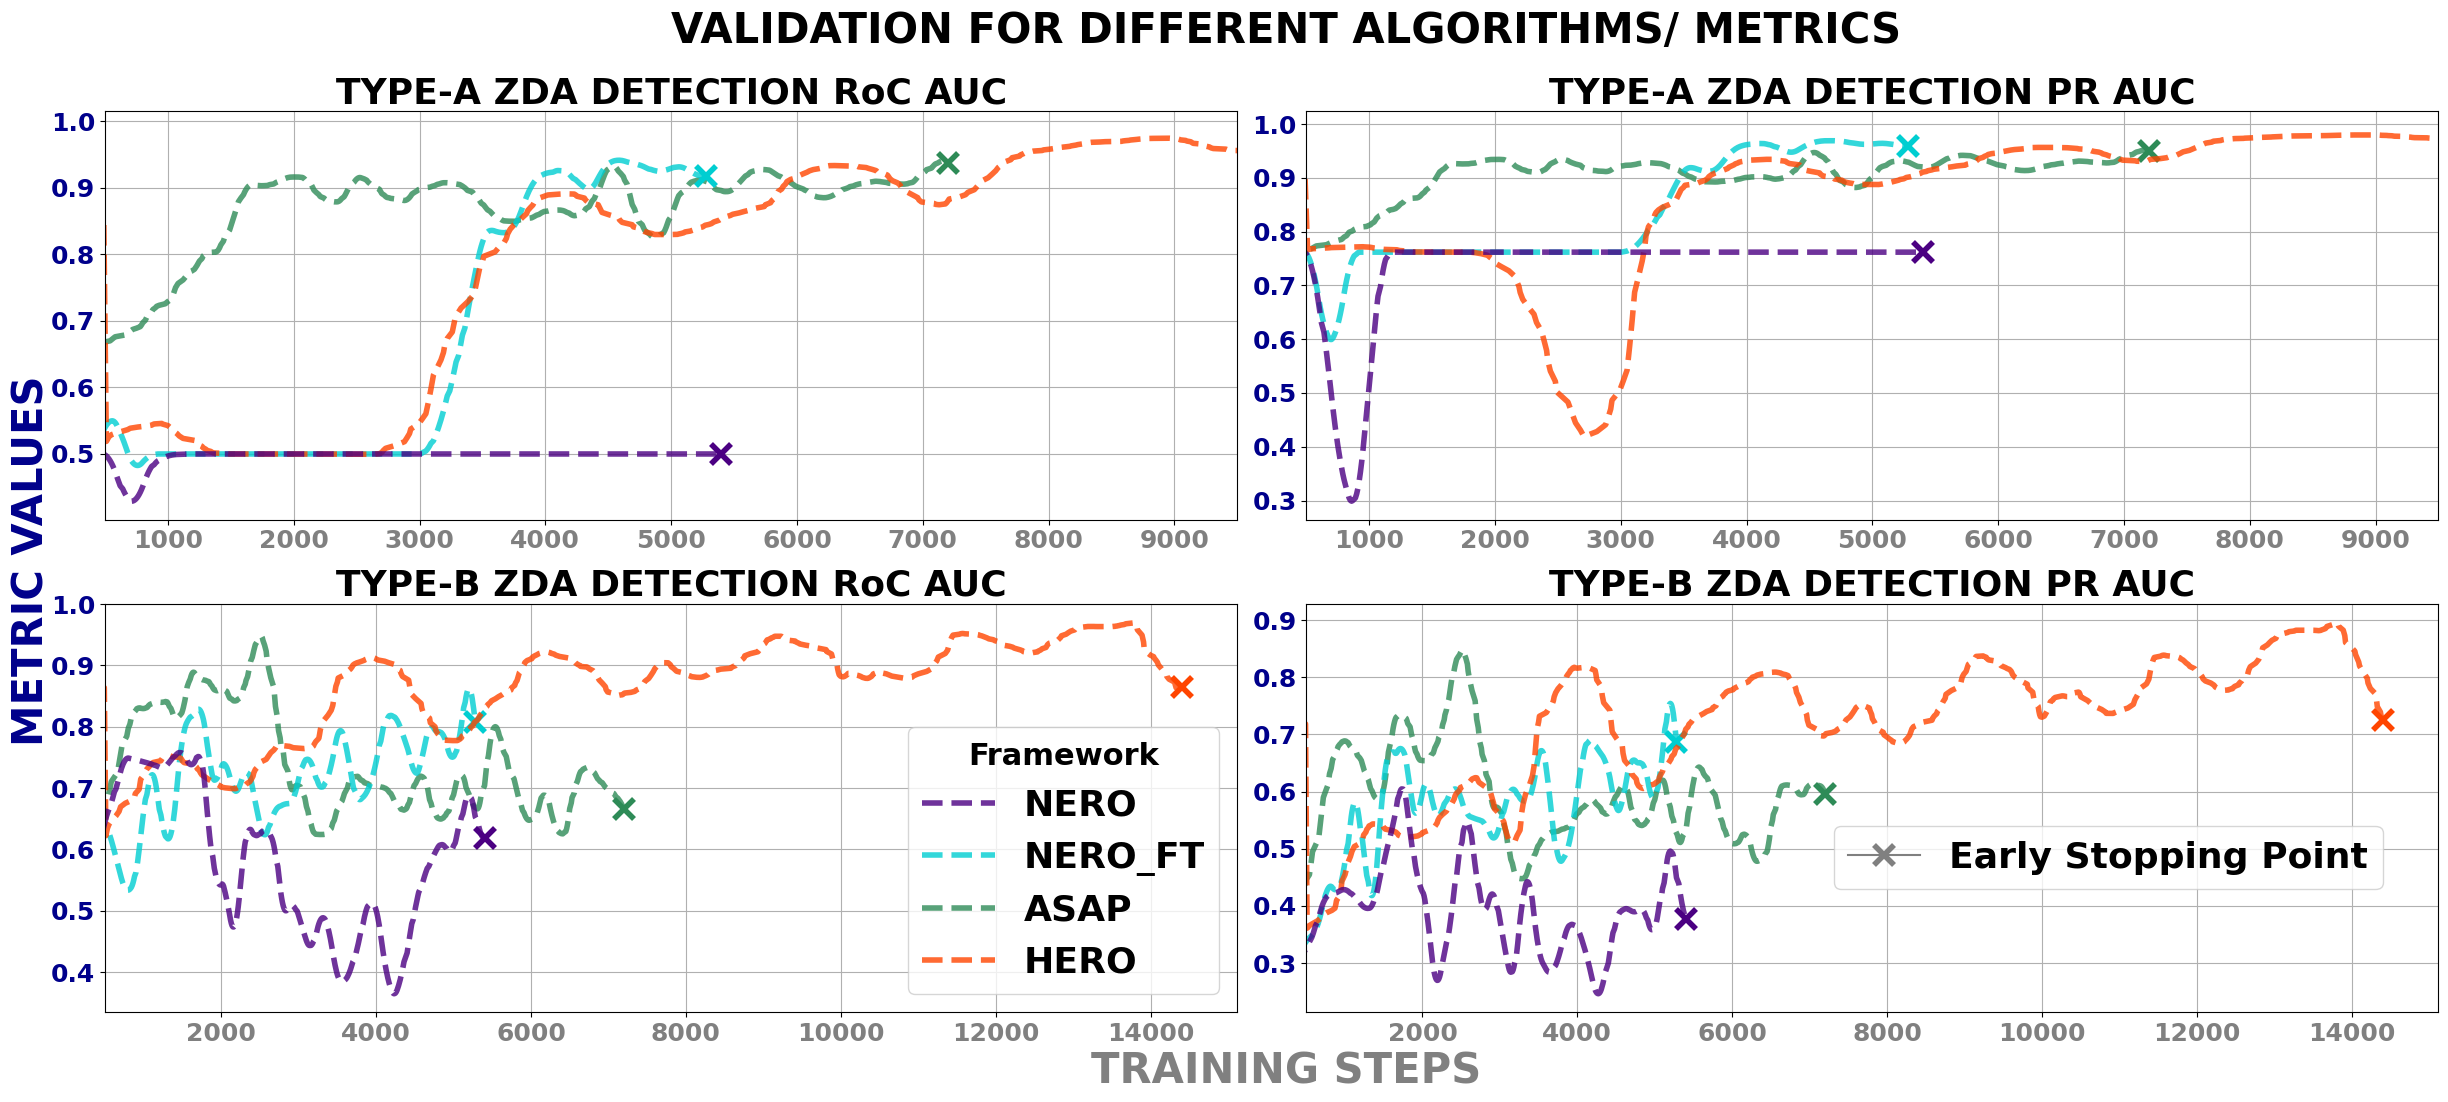

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(25, 10))


metrics_to_plot = ['A_ROC_AUC', 'A_PR_AUC', 'B_ROC_AUC', 'B_PR_AUC']
titles = ['TYPE-A ZDA DETECTION RoC AUC', 'TYPE-A ZDA DETECTION PR AUC', 'TYPE-B ZDA DETECTION RoC AUC', 'TYPE-B ZDA DETECTION PR AUC']
row = 0
col = 0

for i, metric in enumerate(metrics_to_plot):
    for label, df in final_dfs.items():
        axes[row, col].plot(df['training_step'], df[metric], label=label, alpha=0.8, linewidth=4, linestyle='--', color=main_colors[label])
        # plot a cross mark in the last point of the series:
        axes[row, col].plot(df['training_step'].iloc[-1], df[metric].iloc[-1], marker='x', markeredgewidth=4, markersize=15,  color=main_colors[label])
        # add a dummy cross line for label
        axes[row, col].plot([],[], marker='x', markeredgewidth=4, markersize=15,  color='gray', label='Early Stopping Point')

    # axes[row, col].set_xlabel("Training Steps")
    # axes[row, col].set_ylabel(metric)
    axes[row, col].set_title(titles[i],fontdict=subtitle_font_dict)

    for label in axes[row, col].get_xticklabels():
      label.set_fontsize(18)
      label.set_fontweight('bold')  # Set font weight to bold
      label.set_color('gray')
    for label in axes[row, col].get_yticklabels():
      label.set_fontsize(18)
      label.set_fontweight('bold')  # Set font weight to bold
      label.set_color('darkblue')


    if col ==0:
      if row == 0:
        axes[row, col].set_xlim(left=500, right=9500)
      if row == 1:
        axes[row, col].set_xlim(left=500)

        # legend stuff:
        handles, labels = axes[row, col].get_legend_handles_labels()  # Get legend handles and labels
        new_handles = [handles[6], handles[2], handles[0], handles[4]]
        new_labels = [labels[6], labels[2], labels[0], labels[4]]
        axes[row, col].legend(
            new_handles,
            new_labels,
            prop=legend_font_dict,
            title='Framework',
            loc='lower right')
        legend_title = axes[row, col].legend_.get_title()  # Get the legend title object first
        plt.setp(legend_title, fontsize=22, fontweight='bold')

    if col == 1:
      if row == 0:
        axes[row, col].set_xlim(left=500, right=9500)
      if row == 1:
        axes[row, col].set_xlim(left=500)
        axes[row, col].legend(
            [handles[1]],
            [labels[1]],
            prop=legend_font_dict,
            bbox_to_anchor=(0.45, 0.5))

    axes[row, col].grid(True)

    col += 1
    if col == 2:
        col = 0
        row += 1

# Add common labels for both axes
fig.text(-0.002, 0.5, 'METRIC VALUES', ha='center', va='center', rotation='vertical', fontsize=30, weight='bold', color='darkblue')
fig.text(0.5, 1.03, 'VALIDATION FOR DIFFERENT ALGORITHMS/ METRICS', ha='center', va='center', fontsize=30, weight='bold', color='black')
fig.text(0.5, -0.01, 'TRAINING STEPS', ha='center', va='center', fontsize=30, weight='bold', color='gray')


plt.tight_layout()
plt.show()

# HPO and ABLATIONS

In [ ]:
latent_space_hpo_runs = {
    'ft_hspace_512': '512',
    'ft_hspace_256': '256',
    'ft_hspace_128': '128',
    'ft_hspace_64': '64',
    'ft_hspace_1200': '1200',
    'ft_dropout_0.3 BEST': '1024',
    'ft_hspace_1500': '1500'
}

In [ ]:
retraining_proc_runs = {
    'Training_EncDec': 'Frozen',
    'Retraining_FT_ConfDec': '1e-3',
    'ft_proclr_0.00001': '1e-5',
    'ft_proclr_0.0001': '1e-4',
    'ft_proclr_0.00005 BEST': '5e-5',
    'ft_proclr_0.000001': '1e-6'
}

In [ ]:
robust_proc_runs = {
    'ft_super_robust_proc' : '1e-5',
    'ft_robust_proc' : '1e-4',
    'Training_EncDec': '1e-3',
    'ft_hyper_robust_proc BEST LS': '1e-4 (Encoder also)'
}

In [ ]:
encoder_hpo_runs = {
    'Training_EncDec': 'resnet18',
    'enc_mobilenet_v3_large': 'MobileNetV3Large',
    'enc_squeezenet1_1': 'SqueezeNet1.1',
    'enc_squeezenet1_0': 'SqueezeNet1.0',
    'enc_mobilenet_v3_small': 'MobileNetV3Small'
}

In [ ]:
dropout_hpo_runs = [
    'ft_dropout_0.1',
    'ft_dropout_0.2',
    'ft_dropout_0.3 BEST',
    'ft_dropout_0.4',
    'ft_dropout_0.5',
    'Training_EncDec'
    ]

In [ ]:
kr_alpha_finetuning_runs = [
    'hpo_kr_alpha0.5',
    'hpo_kr_alpha0.3',
    'hpo_kr_alpha0.01',
    'hpo_kr_alpha0.1',
    'hpo_kr_alpha0.7',
    'hpo_kr_alpha0.1',
    'Training_EncDec'
    ]

In [ ]:
interesting_metrics = {
    '_step': 'training_step',
    # 'OS1 accuracy_eval: ': 'B_Acc',
    # 'OS2 accuracy_eval: ': 'A_Acc',
    'OS1 Bal. accuracy_eval: ': 'B_Acc',
    'OS2 Bal. accuracy_eval: ': 'A_Acc',
    'CS1 accuracy_eval: ': 'micro_Acc',
    'CS2 accuracy_eval: ': 'macro_Acc',
    'EVAL_Type_A_ROC_AUC': 'A_ROC_AUC',
    'EVAL_Type_A_PR_AUC': 'A_PR_AUC',
    'EVAL_ZDA_ROC_AUC': 'B_ROC_AUC',
    'EVAL_ZDA_PR_AUC' : 'B_PR_AUC',
}
interesting_metrics = {
    '_step': 'training_step',
    # 'OS1 accuracy_eval: ': 'B_Acc',
    # 'OS2 accuracy_eval: ': 'A_Acc',
    'OS1 Bal. accuracy_eval: ': 'M1',
    'OS2 Bal. accuracy_eval: ': 'M2',
    'CS1 accuracy_eval: ': 'M3',
    'CS2 accuracy_eval: ': 'M4',
    'EVAL_Type_A_ROC_AUC': 'M5',
    'EVAL_Type_A_PR_AUC': 'M6',
    'EVAL_ZDA_ROC_AUC': 'M7',
    'EVAL_ZDA_PR_AUC' : 'M8',
}

In [ ]:
ls_reg_hpo_records = []
dropout_hpo_records = []
encoder_records = []
robust_proc_records = []
retrain_proc_records = []
h_dim_hpo_records = []

for key, value in runs_dict.items():

  ##ABLATIONS:

  # Retraining the processor:
  if key in list(retraining_proc_runs.keys()):
    reduced_dataframe = value[list(interesting_metrics.keys())]
    retrain_proc_record = {}
    retrain_proc_record['proc_lr'] = retraining_proc_runs[key]
    for column in reduced_dataframe.columns:
      if column != '_step':
        max_value = reduced_dataframe[column].max()
        quantile085 = reduced_dataframe[column].quantile(0.85)
        retrain_proc_record[interesting_metrics[column]] = max_value
    retrain_proc_records.append(retrain_proc_record)

  # Robust processors:
  if key in list(robust_proc_runs.keys()):
    reduced_dataframe = value[list(interesting_metrics.keys())]
    robust_proc_record = {}
    robust_proc_record['dec_lr'] = robust_proc_runs[key]
    for column in reduced_dataframe.columns:
      if column != '_step':
        max_value = reduced_dataframe[column].max()
        quantile085 = reduced_dataframe[column].quantile(0.85)
        robust_proc_record[interesting_metrics[column]] = max_value
    robust_proc_records.append(robust_proc_record)



  ## HPOS:

  # Latent space dim:
  if key in list(latent_space_hpo_runs.keys()):
    reduced_dataframe = value[list(interesting_metrics.keys())]
    h_dim_record = {}
    h_dim_record['h_dim'] = latent_space_hpo_runs[key]
    for column in reduced_dataframe.columns:
      if column != '_step':
        max_value = reduced_dataframe[column].max()
        quantile085 = reduced_dataframe[column].quantile(0.85)
        h_dim_record[interesting_metrics[column]] = max_value
    h_dim_hpo_records.append(h_dim_record)

  # Encoders:
  if key in list(encoder_hpo_runs.keys()):
    reduced_dataframe = value[list(interesting_metrics.keys())]
    encoder_record = {}
    encoder_record['encoder'] = encoder_hpo_runs[key]
    for column in reduced_dataframe.columns:
      if column != '_step':
        max_value = reduced_dataframe[column].max()
        quantile085 = reduced_dataframe[column].quantile(0.85)
        encoder_record[interesting_metrics[column]] = max_value
    encoder_records.append(encoder_record)

  # Dropout
  if key in dropout_hpo_runs:
    reduced_dataframe = value[list(interesting_metrics.keys())]
    dropout_record = {}
    try:
      if 'BEST' in key:
        dropout_rate = 0.3
      else:
        dropout_rate = float(key.split('dropout_')[-1])
    except:
      dropout_rate = 0
    dropout_record['dropout_rate'] = dropout_rate
    for column in reduced_dataframe.columns:
      if column != '_step':
        max_value = reduced_dataframe[column].max()
        quantile085 = reduced_dataframe[column].quantile(0.85)
        dropout_record[interesting_metrics[column]] = max_value
    dropout_hpo_records.append(dropout_record)


  # LS reg
  if key in kr_alpha_finetuning_runs:

    if isinstance(value, pd.DataFrame):
      reduced_dataframe = value[list(interesting_metrics.keys())]
      # for each column in the reduced_dataframe, we are going to take the maximum value and then create a record for the final hpo_dataset
      ls_record = {}
      try:
        kr_alpha = float(key.split('hpo_kr_alpha')[-1])
      except:
        kr_alpha = 0
        # create a string with greek alpha
        #kr_alpha = r'\alpha' + str(kr_alpha)
      ls_record['reg_factor'] = kr_alpha

      for column in reduced_dataframe.columns:
        if column != '_step':
          max_value = reduced_dataframe[column].max()
          quantile085 = reduced_dataframe[column].quantile(0.85)
          ls_record[interesting_metrics[column]] = max_value

      ls_reg_hpo_records.append(ls_record)


# making dataframes:
encoder_df = pd.DataFrame(encoder_records)
dropout_hpo_df = pd.DataFrame(dropout_hpo_records)
ls_hpo_df = pd.DataFrame(ls_reg_hpo_records)
robust_proc_df = pd.DataFrame(robust_proc_records)
retrain_proc_df = pd.DataFrame(retrain_proc_records)
h_dim_hpo_df = pd.DataFrame(h_dim_hpo_records)

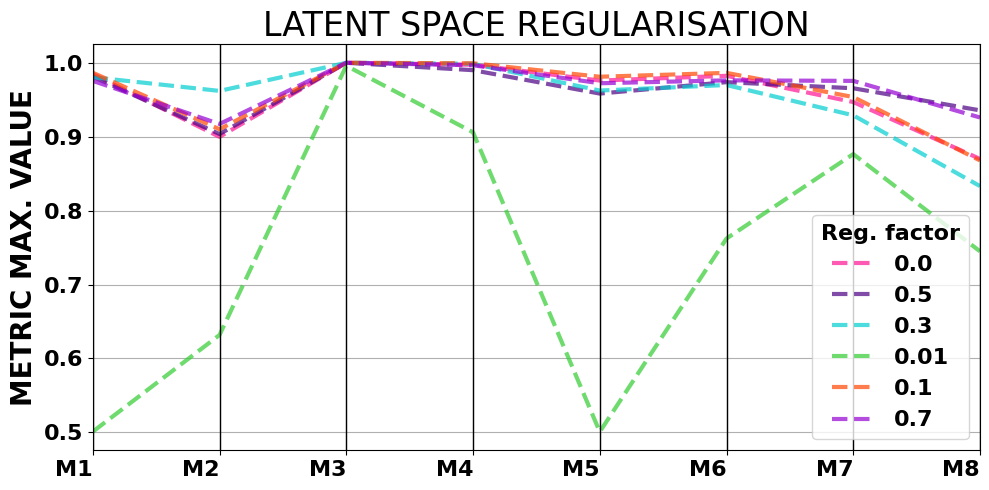

In [ ]:
# Create the parallel coordinates plot
fig, ax = plt.subplots(figsize=(10,5))  # Adjust figsize as needed
parallel_coordinates(
    ls_hpo_df,
    "reg_factor",
    # color=plt.cm.tab20(np.linspace(1, 0, len(hpo_df["reg_factor"].unique()))),
    color=distinct_colors[:len(ls_hpo_df["reg_factor"].unique())],
    linewidth=3,  # Adjust line thickness here
    linestyle='--',
    alpha=0.7,
    ax=ax,
)

# Customize the plot
ax.set_title(
    "LATENT SPACE REGULARISATION", fontsize=24
)
# ax.set_xlabel("Metric Values", fontsize=16, fontweight='bold')
ax.set_ylabel("METRIC MAX. VALUE", fontsize=20, fontweight='bold')
ax.tick_params(axis="both", labelsize=16)
plt.xticks(rotation=0, ha="right", fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()

handles, labels = ax.get_legend_handles_labels()  # Get legend handles and labels
# labels = ['reg='+label for label in labels]

# give the legend a title:
ax.legend(handles, labels, prop={"weight": "bold", "size": 16}, title="Reg. factor")
# Set title font properties separately (The change is here)
legend_title = ax.legend_.get_title()  # Get the legend title object first
plt.setp(legend_title, fontsize=16, fontweight='bold')
# Show the plot
plt.show()

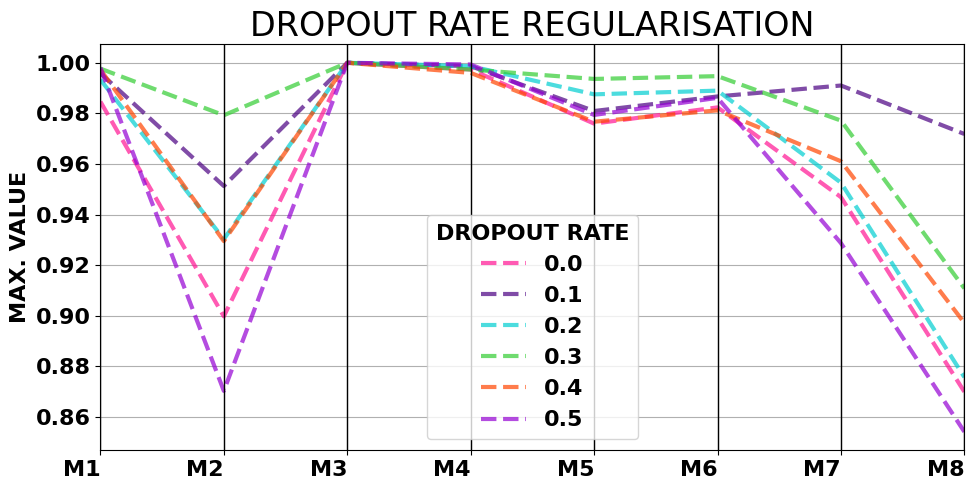

In [ ]:
# Create the parallel coordinates plot
fig, ax = plt.subplots(figsize=(10,5))  # Adjust figsize as needed
parallel_coordinates(
    dropout_hpo_df,
    "dropout_rate",
    color=distinct_colors[:len(dropout_hpo_df["dropout_rate"].unique())],
    linewidth=3,  # Adjust line thickness here
    linestyle='--',
    alpha=0.7,
    ax=ax,
)

# Customize the plot
ax.set_title(
    "DROPOUT RATE REGULARISATION", fontsize=24
)
# ax.set_xlabel("Metric Values", fontsize=16, fontweight='bold')
ax.set_ylabel("MAX. VALUE", fontsize=16, fontweight='bold')
ax.tick_params(axis="both", labelsize=16)
plt.xticks(rotation=0, ha="right", fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()

handles, labels = ax.get_legend_handles_labels()  # Get legend handles and labels
# labels = ['reg='+label for label in labels]

# give the legend a title:
ax.legend(handles, labels, prop={"weight": "bold", "size": 16}, title="DROPOUT RATE")
# Set title font properties separately (The change is here)
legend_title = ax.legend_.get_title()  # Get the legend title object first
plt.setp(legend_title, fontsize=16, fontweight='bold')
# Show the plot
plt.show()

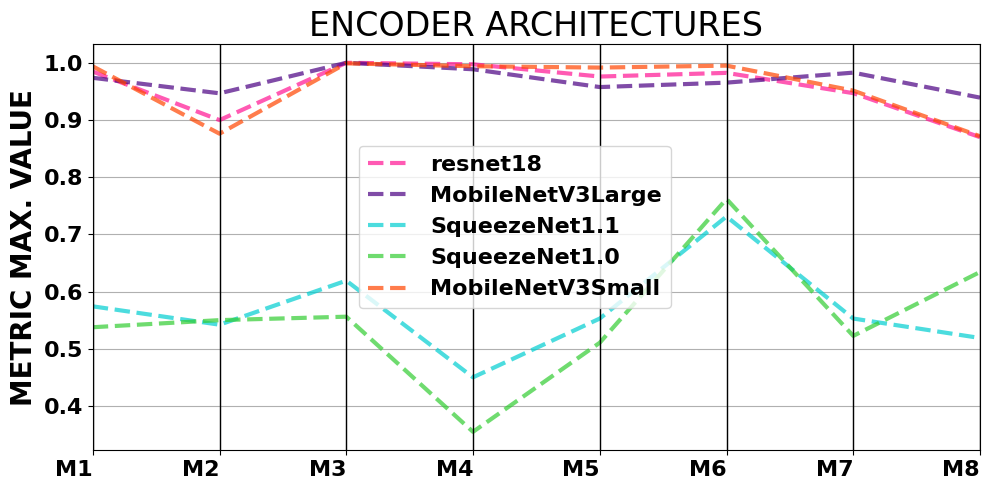

In [ ]:
# Create the parallel coordinates plot
fig, ax = plt.subplots(figsize=(10,5))  # Adjust figsize as needed
parallel_coordinates(
    encoder_df,
    "encoder",
    color=distinct_colors[:len(encoder_df["encoder"].unique())],
    linewidth=3,  # Adjust line thickness here
    linestyle='--',
    alpha=0.7,
    ax=ax,
)

# Customize the plot
ax.set_title(
    "ENCODER ARCHITECTURES", fontsize=24
)
# ax.set_xlabel("Metric Values", fontsize=16, fontweight='bold')
ax.set_ylabel("METRIC MAX. VALUE", fontsize=20, fontweight='bold')
ax.tick_params(axis="both", labelsize=16)
plt.xticks(rotation=0, ha="right", fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()

handles, labels = ax.get_legend_handles_labels()  # Get legend handles and labels
# labels = ['reg='+label for label in labels]



# give the legend a title:
ax.legend(handles, labels, prop={"weight": "bold", "size": 16}, loc=(0.3, 0.35) )

# Set title font properties separately (The change is here)
legend_title = ax.legend_.get_title()  # Get the legend title object first
plt.setp(legend_title, fontsize=16, fontweight='bold')
# Show the plot
plt.show()

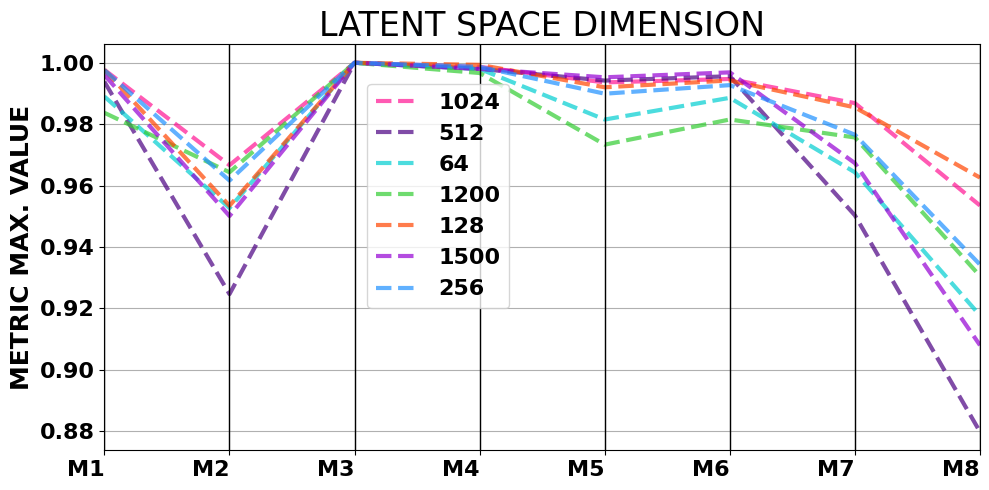

In [ ]:
# Create the parallel coordinates plot
fig, ax = plt.subplots(figsize=(10,5))  # Adjust figsize as needed
parallel_coordinates(
    h_dim_hpo_df,
    "h_dim",
    color=distinct_colors[:len(h_dim_hpo_df["h_dim"].unique())],
    linewidth=3,  # Adjust line thickness here
    linestyle='--',
    alpha=0.7,
    ax=ax,
)

# Customize the plot
ax.set_title(
    "LATENT SPACE DIMENSION", fontsize=24
)
# ax.set_xlabel("Metric Values", fontsize=16, fontweight='bold')
ax.set_ylabel("METRIC MAX. VALUE", fontsize=18, fontweight='bold')
ax.tick_params(axis="both", labelsize=16)
plt.xticks(rotation=0, ha="right", fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()

handles, labels = ax.get_legend_handles_labels()  # Get legend handles and labels
# labels = ['reg='+label for label in labels]



# give the legend a title:
ax.legend(handles, labels, prop={"weight": "bold", "size": 16}, loc=(0.3, 0.35) )

# Set title font properties separately (The change is here)
legend_title = ax.legend_.get_title()  # Get the legend title object first
plt.setp(legend_title, fontsize=16, fontweight='bold')
# Show the plot
plt.show()

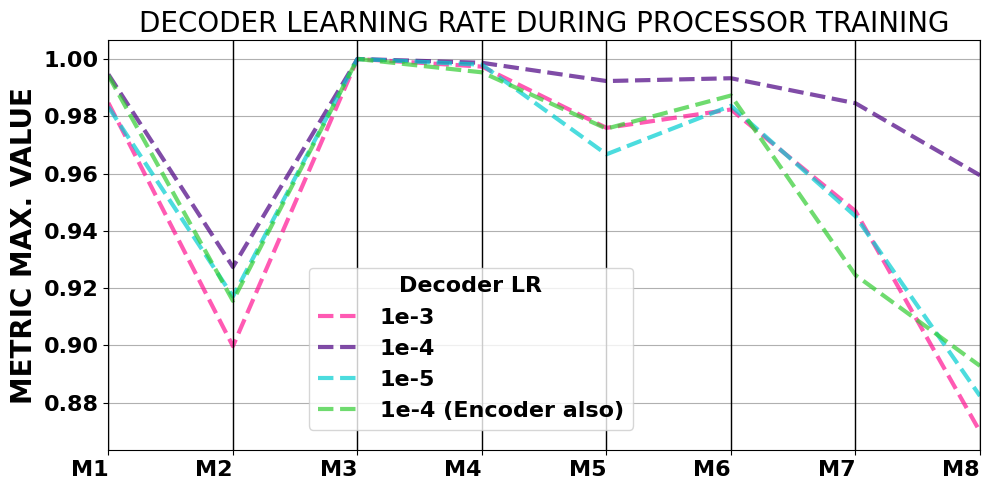

In [ ]:
# Create the parallel coordinates plot
fig, ax = plt.subplots(figsize=(10,5))  # Adjust figsize as needed
parallel_coordinates(
    robust_proc_df,
    "dec_lr",
    color=distinct_colors[:len(robust_proc_df["dec_lr"].unique())],
    linewidth=3,  # Adjust line thickness here
    linestyle='--',
    alpha=0.7,
    ax=ax,
)

# Customize the plot
ax.set_title(
    "DECODER LEARNING RATE DURING PROCESSOR TRAINING", fontsize=20
)
# ax.set_xlabel("Metric Values", fontsize=16, fontweight='bold')
ax.set_ylabel("METRIC MAX. VALUE", fontsize=20, fontweight='bold')
ax.tick_params(axis="both", labelsize=16)
plt.xticks(rotation=0, ha="right", fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()

handles, labels = ax.get_legend_handles_labels()  # Get legend handles and labels
# labels = ['reg='+label for label in labels]



# give the legend a title:
ax.legend(handles, labels, prop={"weight": "bold", "size": 16}, loc=(0.23, 0.05), title='Decoder LR' )

# Set title font properties separately (The change is here)
legend_title = ax.legend_.get_title()  # Get the legend title object first
plt.setp(legend_title, fontsize=16, fontweight='bold')
# Show the plot
plt.show()

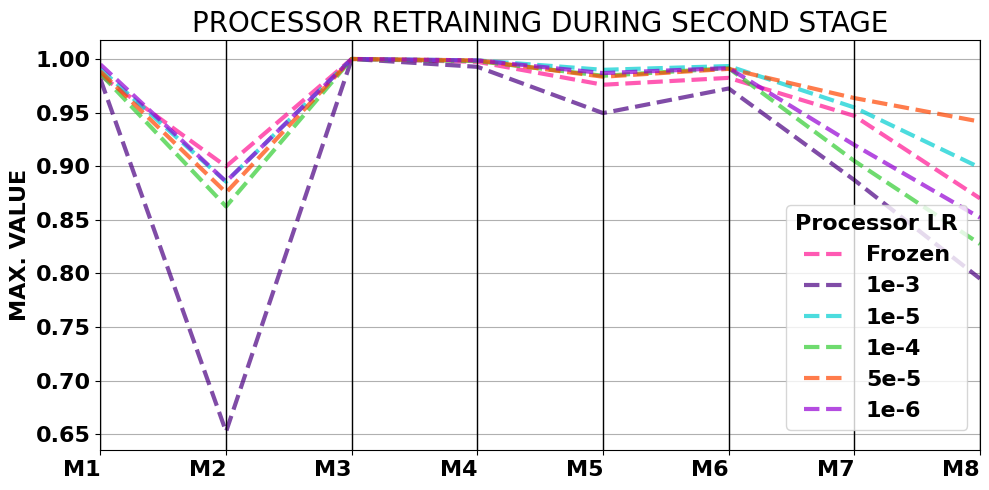

In [ ]:
# Create the parallel coordinates plot
fig, ax = plt.subplots(figsize=(10,5))  # Adjust figsize as needed
parallel_coordinates(
    retrain_proc_df,
    "proc_lr",
    color=distinct_colors[:len(retrain_proc_df["proc_lr"].unique())],
    linewidth=3,  # Adjust line thickness here
    linestyle='--',
    alpha=0.7,
    ax=ax,
)

# Customize the plot
ax.set_title(
    "PROCESSOR RETRAINING DURING SECOND STAGE", fontsize=20
)
# ax.set_xlabel("Metric Values", fontsize=16, fontweight='bold')
ax.set_ylabel("MAX. VALUE", fontsize=16, fontweight='bold')
ax.tick_params(axis="both", labelsize=16)
plt.xticks(rotation=0, ha="right", fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()

handles, labels = ax.get_legend_handles_labels()  # Get legend handles and labels
# labels = ['reg='+label for label in labels]



# give the legend a title:
ax.legend(handles, labels, prop={"weight": "bold", "size": 16}, loc=(0.78, 0.05), title='Processor LR')

# Set title font properties separately (The change is here)
legend_title = ax.legend_.get_title()  # Get the legend title object first
plt.setp(legend_title, fontsize=16, fontweight='bold')
# Show the plot
plt.show()